In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from Functions import *
from lr_util import load_dataset


%matplotlib inline


#加载数据,存放到变量里
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T #现在将209组x训练样本数据放入特征向量里(12288*209)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T #现在将50组x测试样本放入特征向量里（12288*50）
train_set_x = train_set_x_flatten/255  #将数据标准化，使得收敛速度更快
test_set_x = test_set_x_flatten/255


#使用Logistic Regression模型
d = Logestic_regression_model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations = 2000,learning_rate=0.007,print_cost =True)
print(d["Y_prediction_test"][0][5])
print(test_set_y[0][5])

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.778332
Cost after iteration 200: 0.589491
Cost after iteration 300: 0.492116
Cost after iteration 400: 0.395530
Cost after iteration 500: 0.303775
Cost after iteration 600: 0.231449
Cost after iteration 700: 0.204820
Cost after iteration 800: 0.190106
Cost after iteration 900: 0.177450
Cost after iteration 1000: 0.166363
Cost after iteration 1100: 0.156544
Cost after iteration 1200: 0.147779
Cost after iteration 1300: 0.139903
Cost after iteration 1400: 0.132788
Cost after iteration 1500: 0.126331
Cost after iteration 1600: 0.120444
Cost after iteration 1700: 0.115058
Cost after iteration 1800: 0.110111
Cost after iteration 1900: 0.105554
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
1.0
0


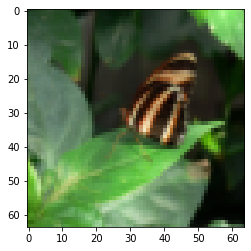

In [20]:
index = 5
plt.imshow(test_set_x_orig[index])

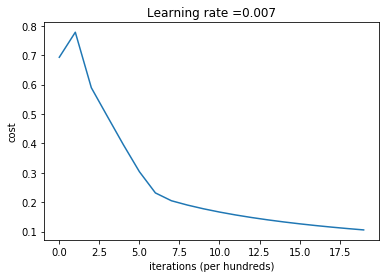

In [21]:
#绘制cost-t图像
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


y = 1.0, your algorithm predicts a "cat" picture.


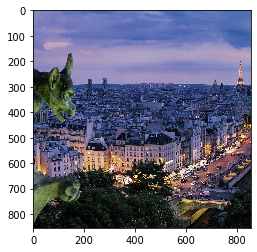

In [23]:
my_image = "gargouille.jpg"    

num_px = train_set_x_orig.shape[1]

# We preprocess the image to fit your algorithm.
fname = "F:/课后作业/代码作业/第一课第二周编程作业/assignment2/images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")